# KMeans Cluster Analysis
## based on https://www.udemy.com/course/machinelearning/
## Machine Learning A-Z
highly recommend

## small file using two fields to allow visual: Mall_Customers.csv

## Data Prep (Import and Analysis)

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
#importing data
df = pd.read_csv("Mall_Customers.csv")
print(df.shape)
df.head(3)

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [8]:
X = df.iloc[:, 3:].values
pd.DataFrame(X).head(3)

,0,1
0,15,39
1,15,81
2,16,6


Text(0, 0.5, 'Spending Score')

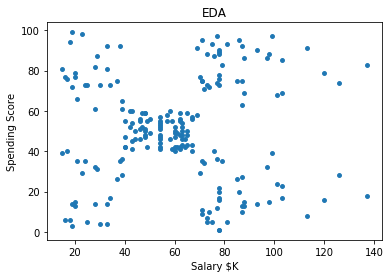

In [12]:
plt.scatter(X[:, 0], X[:, 1], s= 15)
plt.title("EDA")
plt.xlabel("Salary $K")
plt.ylabel("Spending Score")

## Calculate Number of Clusters - the Elbow Method, Modelling

In [17]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i)
    model.fit(X)
    wcss.append(model.inertia_)

Text(0.5, 1.0, 'EDA')

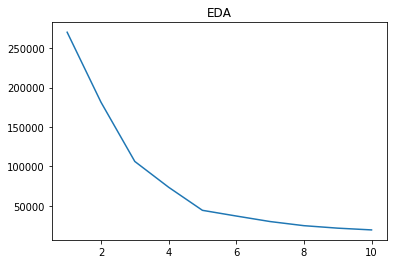

In [19]:
plt.plot(range(1,11), wcss)
plt.title("EDA")

## Visuals / Evaluation

In [25]:
model = KMeans(n_clusters = 5)
model.fit(X)
prediction = model.predict(X)
df_pred = pd.DataFrame(prediction)
df_pred[0].value_counts()

0    81
1    39
3    35
4    23
2    22
Name: 0, dtype: int64

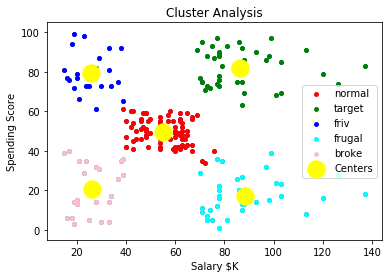

In [41]:
plt.scatter(X[:, 0], X[:, 1], s= 15)


plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s= 15, color = "red", label = "normal")
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s= 15, color = "green", label = "target")
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s= 15, color = "blue", label = "friv")
plt.scatter(X[prediction == 3, 0], X[prediction == 3, 1], s= 15, color = "cyan", label = "frugal")
plt.scatter(X[prediction == 4, 0], X[prediction == 4, 1], s= 15, color = "pink", label = "broke")

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, color = "yellow", label = "Centers")

plt.title("Cluster Analysis")
plt.xlabel("Salary $K")
plt.ylabel("Spending Score")
plt.legend()